<img src="images/logo.png" width="200">

# KogSys-KI-B - Assignment 1

### Suche, Heuristische Suche

_Abgabefrist: **25.05.2025**_

---



#### Abgabe Informationen

Laden Sie Ihre Lösung über den VC-Kurs hoch. Bitte laden Sie **ein Zip-Archiv** pro Gruppe hoch. Dieses muss enthalten::

- Ihre Lösung als **Notebook** (eine `.ipynb`-Datei)
- Ein Ordner mit dem Namen **images**, der alle Ihre Bilder enthält, falls Sie welche verwendet haben (halten Sie die Bildgrößen relativ klein)

Ihr Zip-Archiv sollte wie folgt benannt werden:

```
assignment_<Assignmentnummer>_solution_<Gruppennummer>.zip
```

In dieser Aufgabe können Sie insgesamt **20 Punkte** erreichen. Von diesen Punkten werden **2 Bonuspunkte** für die Prüfung wie folgt berechnet:

| **Points in Assignment** | **Bonus Points for Exam** |
| :----------------------: | :-----------------------: |
|            20            |             2             |
|            15            |            1.5            |
|            10            |             1             |
|            5             |            0.5            |

<div class='alert alert-block alert-danger'>

##### **Wichtige Hinweise**

1. **Diese Aufgabe wird benotet. Sie können Bonuspunkte für die Prüfung erwerben.**
2. **Wenn offensichtlich ist, dass eine Aufgabe von einer anderen Quelle kopiert wurde und keine eigenständige Arbeit geleistet wurde, werden keine Bonuspunkte vergeben. Bitte formulieren Sie alle Antworten in Ihren eigenen Worten!**
3. **Falls LLMs (wie ChatGPT oder Copilot) zur Erstellung Ihrer Einreichung verwendet wurden, geben Sie dies bitte gemäß den gängigen wissenschaftlichen Praktiken an. Siehe auch die [KI Policy im VC-Kurs](https://vc.uni-bamberg.de/mod/page/view.php?id=1980835)**

### Setup

Um euer assignment aufzusetzen, müsst ihr die notwendigen pakete installieren, welche in der Datein `requirements.txt` gelistet sind. Dies könnt ihr machen, indem ihr die folgende Zelle ausführt.

In [35]:
# Installiert die benötigten Pakete mit dem akutell ausgewählten Python-Interpreter
%pip install -U -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Bibliotheks-Imports

**_Import von Bibliotheken._** In der folgenden Zelle werden einige wichtige Bibliotheken importiert. Dies soll hier kurz erläutert werden. Verwenden Sie keine anderen Drittanbieterbibliotheken.

- `typing.Any` und `typing.Callable`: Wird für Typanmerkungen in den Methodenspezifikationen benötigt.
- `pathlib.Path`. Objektorientierte und platformunabhängige Darstellung von Dateipfaden.
- `math`. Verschiedene Mathematische Funktionen wie _sqrt_ oder _sin_.
- `dataclasses.dataclass`. Einfache Erstellung von Immuatablen Klassen.
- `random`: Dies Bibliothek wird als Zufallsgenerator verwendet, und um _Seeds_ festzulegen, damit die Ergebnisse konsistent gehalten werden.
- `pandas` und `numpy`: Ihr dürf numpy und DataFrames von pandas verwenden um Datensätze zu laden und anzupassen.
- `networkx`: Diese Bibliothek wird verwendet, um Graph-Netzwerke zu speichern.
- `matplotlib.pyplot`: Diese Bibliothek wird verwendet, um Bilder der Grafiken anzuzeigen.

**_In der nächsten Codezelle muss nichts geändert werden._**

In [36]:
# Python Core libraries
from typing import Any, Callable
from pathlib import Path
import math
import random
from dataclasses import dataclass

# Allowed Third-party libraries
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime

random.seed(2025)
print("Random seed set to 2025") #test

Random seed set to 2025


## Aufgabe 1 | Suche

_Für insgesamt 8 Punkte_

Sie erhalten ein Fluss-Netzwerk, das das Rohrsystem einer Stadt darstellt. Jede Kante des Graphen hat eine Kapazität, die die maximale Wassermenge angibt, die pro Minute durch dieses Rohr fließen kann. Es gibt eine `source` (Quelle, Knoten mit Index 0) und ein `target` (Senke, Knoten mit Index 9).

---

<details>
<summary><strong>Tipp:</strong> Auf die Knoten und Kanten des Graphen in networkx zugreifen</summary>

[Die Dokumentation ist hier zu finden.](https://networkx.org/documentation/stable/tutorial.html)

**Alle Daten auslesen**
```python
# Die Knoten auslesen
> list(G.nodes)
[0,1,2,3,4,5,6,7,8,9,10]
# Die Kanten auslesen
> list(G.edges)
[(0, 1),
 (0, 2),
 (1, 9),
 ...]
# Die Kanten mit angehängten Daten auslesen
> list(G.edges(data=True))
[(0, 1, {'capacity': 57}),
 (0, 2, {'capacity': 41}),
 (1, 9, {'capacity': 59}),
 ...]
```

**Nachbarn auslesen**
```python
# Die Nachbarn von Knoten 0
> list(G[0]) # oder list(G.neighbors(0)) oder list(G.successors(0))
[1, 2]
```

**Kanten auslesen**
```python
# Die Daten der Kante 0 -> 1
> G[0][1] # or G.edges[0,1]
{'capacity': 57}
```

**Beispielhafte imperative Implementierung einer Tiefensuche**
```python
def dfs(G: nx.DiGraph, source: int, target: int) -> list[int] | None:
    stack = [(source, [source])]
    while stack:
        (node, path) = stack.pop()
        for next in G.neighbors(node):
            if next in path:
                continue
            elif next == target:
                return path + [next]
            else:
                stack.append((next, path + [next]))
    return None
dfs(G, 0, 10)
# -> [0, 2, 4, 6, 10]
```

</details>

#### Fluss-Netzwerk Generierung

Im Folgenden definieren wir eine Funktion, die das zufällige Flussnetzwerk erzeugt, das in dieser Aufgabe verwendet wird.

**_In der nächsten Codezelle muss nichts geändert werden._**

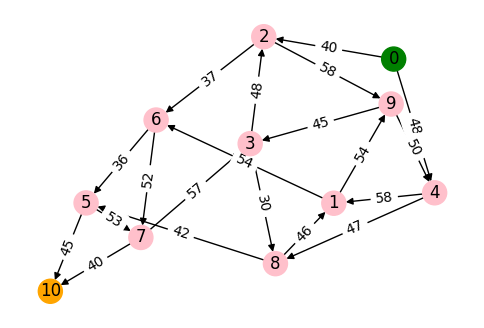

In [37]:
# Code for generating a flow network and plotting it

from cProfile import label


def generate_flow_network(num_nodes: int, num_edges: int, min_capacity: int, max_capacity: int, seed=2025) -> nx.Graph:
    """
    Generate a random directed flow network with specified parameters.
    
    Returns:
        A directed graph (DiGraph) with random capacities and costs on edges.
        The graph is read-only to prevent unintended modifications.
    """
    # Reset the random seed for reproducibility
    random.seed(seed)
    
    # Need to distribute the edges among the nodes, ensuring that each node has at least one incoming and one outgoing edge.
    distribute_amount = lambda x, n: [1 + ((remaining := x - n) // n) + (1 if i < remaining % n else 0) for i in range(n)] if n <= x else []
    degrees = distribute_amount(num_edges, num_nodes - 1)
    in_degree = [0] + random.sample(degrees, k=len(degrees))  # First node has no outgoing edges
    out_degree = random.sample(degrees, k=len(degrees)) + [0]  # Last node has no outgoing edges

    G = nx.DiGraph()
    G.add_nodes_from(range(num_nodes))
    
    # Add additional edges to ensure the graph has the desired number of edges
    for u in range(num_nodes):
        for _ in range(out_degree[u]): 
            # Select a random node to connect to, ensuring it is not the same as u and does not already have an edge with u
            try:
                v = random.choice([n for n in G.nodes() if n != u and not G.has_edge(u, n) and not G.has_edge(n, u) and in_degree[n] > G.in_degree(n)]) 
            except IndexError as e:
                v = random.choice([n for n in G.nodes() if n != u and not G.has_edge(u, n) and not G.has_edge(n, u) and in_degree[n] != 0])
            capacity = random.randint(min_capacity, max_capacity)
            G.add_edge(u, v, capacity=capacity)

    return nx.restricted_view(G, [], [])

def plot_flow_network(G: nx.DiGraph, path: list[int] | None = None):
    """Plot the flow network using matplotlib and networkx.

    Args:
        G (nx.DiGraph): The flow network graph to plot.
        path (list[int] | None, optional): A path through the network to highlight. Defaults to None.
    """
    pos = nx.kamada_kawai_layout(G)
    edge_colors = 'black'
    if path:
        # Highlight the path in the graph
        path_edges = list(zip(path, path[1:]))
        edge_colors = ['blue' if (u, v) in path_edges else 'black' for u, v in G.edges()]
    nx.draw_networkx(G, pos, node_color=['green']+ ['pink']*(len(G.nodes)-2) + ['orange'], arrowsize=10, with_labels=True, edge_color=edge_colors)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['capacity']}" for u, v, d in G.edges(data=True)})
    fig = plt.gcf()
    fig.set_size_inches(6, 4)

    plt.axis("off")
    plt.show()

G = generate_flow_network(11, 20, 30, 60, datetime.now().microsecond % 1000)
plot_flow_network(G) # type: ignore


#### **(01.1.1)** Pfad mit maximalem Durchfluss

_Für **4** Punkte_

Finden Sie den Weg mit dem maximalen Fluss durch das Netz von `source` (Quelle) zu `target` (Senke). Welchen der in der Vorlesung vorgestellten Algorithmen würden Sie für diese Aufgabe verwenden, und warum?

Schreiben Sie Ihren Ansatz auf, bevor Sie ihn in Python umsetzen.


> 
> Sinnvoll ist hier der best first search.
> Maximaler Durchfluss ist $min(k_i)$, wobei $k_i$ die Kosten der einzelnen Kanten i sind.
> 

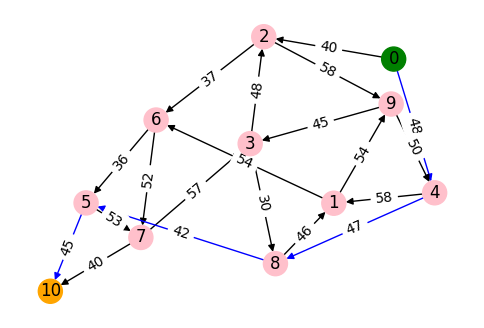

In [38]:
# Implementation of task 01.1.1
def path_with_maximum_capacity(G: nx.DiGraph, source: int, target: int) -> list[int]:
    """
    Find the path with maximum capacity from source to target in the flow network.

    Args:
        G (nx.DiGraph): The flow network graph.
        source (int): The source node.
        target (int): The target node.

    Returns:
        list[int]: The path with maximum capacity from source to target.
    """
    """Implement best first search:
    Form a one-element queue consisting of a zero-length path that contains only the root
    node.
    Until the first path in the queue terminates at the goal node or the queue is empty,
        Remove the first path from the queue; create new paths by extendingthe first path to all neighbors of the terminal node.
        Reject all new paths with loops.
        Add the new paths, if any, to the queue.
        Sort entire queue by the estimated distances between their terminal
        nodes and the goal
        If the goal node is found, announce success; otherwise announce failure."""
    queue = [[source]]  # Start with a path containing only the source node
    visited = set()  # To keep track of visited nodes

    while queue:
        current_path = queue.pop(0)  # Get the first path in the queue
        current_node = current_path[-1]
        if current_node == target:
            return current_path
        visited.add(current_node)
        for neighbor in G.neighbors(current_node):
            if neighbor not in visited:
                new_path = current_path + [neighbor]
                # Calculate the minimum capacity of the edges in the new path
                capacity = min(G[u][v]['capacity'] for u, v in zip(new_path[:-1], new_path[1:]))
                # Sort the queue by the capacity of the paths (descending order)
                queue.append(new_path)
                queue.sort(key=lambda p: min(G[u][v]['capacity'] for u, v in zip(p[:-1], p[1:])), reverse=True)
    return []  # Return an empty path because no path was found

path = path_with_maximum_capacity(G, 0, 10)
plot_flow_network(G, path) # type: ignore

#### **(01.1.2)** Große Netzwerke

_Für **2** Punkte_

In den folgenden Codezellen haben werden größere Netze erzeugt. Was passiert, wenn du deinen Code auf diesen Netzen ausführst? Erkläre, warum!

**_In den nächsten Codezellen muss nichts geändert werden._**

In [39]:
# You do not need to modify the code in the following cells.
# You may however do some experiments with the parameters and random seeds to see how your code behaves.

G_large = generate_flow_network(21, 80, 25, 60)
G_huge = generate_flow_network(51, 900, 25, 60)

In [40]:
path_with_maximum_capacity(G_large, 0, 20)

[0, 7, 10, 20]

In [41]:
path_with_maximum_capacity(G_huge, 0, 50)

[0, 20, 43, 35, 50]


> 
> die Laufzeit steigt in $x = \Omega(log(n))$ 
> 

#### **(01.1.3)** Kosten pro Liter

_Für **2** Punkte_

Angenommen, jedes Rohr hat auch Kosten pro Liter Wasser, der durch das Rohr fließt, und Sie möchten die Gesamtkosten minimieren, während Sie den Durchfluss maximieren.
Was müssen Sie in Ihrer Implementierung für die Funktion `path_with_maximum_capacity_minimum_cost` ändern, um dies zu unterstützen?

Schreiben Sie Ihren Ansatz auf, bevor Sie ihn in Python umsetzen.

#### Kosten an die Kanten anfügen

Eine Funktion, die dem Graphen zufällige Kosten hinzufügt.

**_In der nächsten Codezelle muss nichts geändert werden._**

In [42]:
def graph_with_edge_costs(G: nx.DiGraph, min_cost: int, max_cost: int, seed: int = 2025) -> None:
    """
    Add random costs to the edges of the graph.

    Args:
        G (nx.DiGraph): The flow network graph.
        min_cost (int): Minimum cost for edges.
        max_cost (int): Maximum cost for edges.
    """
    random.seed(seed)
    G = nx.DiGraph(G)  # Create a copy of the graph to avoid modifying the original
    for u, v in G.edges():
        cost = random.randint(min_cost, max_cost)
        G[u][v]['cost'] = cost
    return nx.restricted_view(G, [], [])

G_with_costs = graph_with_edge_costs(G, 20, 50)


> 
> Geändert werden muss nur die Sortierung der wegequeue, sodass nicht mehr nach minimalem durchlass sortiert wird, sondern $\text{min Durchlass} \cdot \text{\#Kanten}$
> 

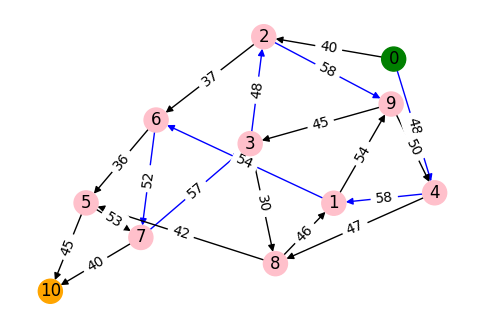

In [56]:
# Implementation of task 01.1.3

def path_with_maximum_capacity_minimum_cost(G: nx.DiGraph, source: int, target: int) -> list[int]:
    """
    Find the path with maximum capacity and minimum cost from source to target in the flow network.

    Args:
        G (nx.DiGraph): The flow network graph.
        source (int): The source node.
        target (int): The target node.

    Returns:
        list[int]: The path with maximum capacity and minimum cost from source to target.
    """
    queue = [[source]]  # Start with a path containing only the source node
    visited = set()  # To keep track of visited nodes

    while queue:
        current_path = queue.pop(0)  # Get the first path in the queue
        current_node = current_path[-1]
        if current_node == target:
            return current_path
        visited.add(current_node)
        for neighbor in G.neighbors(current_node):
            if neighbor not in visited:
                new_path = current_path + [neighbor]
                # Sort the queue by the capacity of the paths (descending order)
                queue.append(new_path)
                queue.sort(key=lambda p: min(G[u][v]['capacity'] for u, v in zip(p[:-1], p[1:])) * len(p), reverse=True)
    return []  # Return an empty path because no path was found

path = path_with_maximum_capacity_minimum_cost(G_with_costs, 0, 9)  # type: ignore
plot_flow_network(G, path)

## Aufgabe 2 | Heuristische Suche mit A*

_Für insgesamt 12 Punkte_

In der gesamten Aufgabe werden wir den [GTFS.de](https://gtfs.de/de/feeds/) Datensatz zum Deutschen Schienennetz verwenden. Wir wollen so einen A* Algorithmus implementieren, welcher es uns ermöglicht die schnellsten Verbindungen zu finden.

<div class="alert-warning" style="padding: 1rem">
Zur vereinfachung ignorieren wir in dieser Aufgabe die unterschiedlichen Ankunfts- und Abfahrtszeiten. Wir betrachten lediglich die Stationen sowie die Fahrtdauer.

**_Datenmodell._** In der folgenden Zelle werden zwei Klassen definiert, um die Daten darzustellen.

- `Connection` stellt eine Verbindung von einem `Stop` zu einem anderen `target_stop_id` dar. Diese Verbindung hat eine Reisedauer von `travel_minutes`.
- `Stop` stellt eine Haltestelle mit einer eindeutigen `id`, einem `name` und `connections` dar. Eine Haltestelle hat mehrere _ausgehende_ `Connections`. Zudem werden in `Stop` noch die `lat` bzw. `lon` Koordinaten der Haltestelle gespeichert.

**_An der nächsten Code Zelle darf nichts verändert werden._**

In [44]:
@dataclass(frozen=True)
class Connection:
    """A connection, from one stop to the target stop that takes some time."""

    target_stop_id: str
    travel_minutes: float


@dataclass(frozen=True)
class Stop:
    """A single stop with outgoing connections."""

    id: str
    name: str
    lat: float
    lon: float
    connections: frozenset[Connection]

#### **(01.2.1)** Import des Datensatzes

_Für **2** Punkte_


In der folgenden Zelle soll der Datensatz _Schienenfernverkehr Deutschland_ geladen werden. Dieser befindet sich im Ordner `task_2_data` und wurde gemäß [Creative Commons 4.0](https://creativecommons.org/licenses/by/4.0/) Lizenz von [GTFS.de](https://gtfs.de/de/feeds/) heruntergeladen.

In diesem Datensatz finden sich verschiedene Dateien.
Alle Daten sind im CSV-Format ("Comma-Separated Values") gespeicher. Dieses speichert tabellarische Daten, bei denen die Werte einer Zeile durch Kommata getrennt sind. Jede Zeile entspricht einer Datensatzzeile, die erste Zeile enthält normalerweise die Spaltenüberschriften.

Um in Python über die Zeilen einer CSV-Datei zu iterieren, kann folgender Code verwendet werden:

```python
import csv

with open("stops.csv", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    
    # or do whatever you want with the reader iterable
    map(lambda row: print(row), reader)
```

Wir benötigen nur zwei Dateien des Datensatzes: `stops.csv` und `stop_times.csv`. Deren Inhalt ist im folgenden kurz erklärt.

Die Datei `stops.csv` enthält alle verfügbaren Haltestellen im Verkehrsnetz.
Jede Zeile beschreibt eine Haltestelle anhand von vier wesentlichen Attributen:
- `stop_id`: Eine eindeutige Identifikationsnummer für die Haltestelle.
- `stop_name`: Der Name der Haltestelle (z.B. "Central Station").
- `stop_lat`: Die geografische Breite der Haltestelle (Latitude).
- `stop_lon`: Die geografische Länge der Haltestelle (Longitude).

Die Datei `stop_times.csv` enthält die Reihenfolge, in der Haltestellen im Rahmen einer Fahrt (`trip_id`) besucht werden, sowie die Ankunfts- und Abfahrtszeiten.
Jede Zeile beschreibt einen Halt an einer Haltestelle innerhalb einer bestimmten Fahrt mit folgenden Informationen:
- `trip_id`: Eine ID, die eine spezifische Fahrt beschreibt.
- `arrival_time`: Die Ankunftszeit an der Haltestelle (im Format `HH:MM:SS`).
- `departure_time`: Die Abfahrtszeit von der Haltestelle (ebenfalls `HH:MM:SS`).
- `stop_id`: Die ID der Haltestelle.
- `stop_sequence`: Die Reihenfolge dieses Haltes innerhalb der Fahrt.

_Tatsächlich enthalten beide Dateien weitere Attribute, diese sind für die Bearbeitung der Aufgabe allerdings nicht notwendig._


Vervollständige nun das vorgegebene Codegerüst, um alle `Stop`s mit ihren `Connection`s aus dem Datensatz zu laden.


---

<details>
<summary>Tipp um die Kanten des Graphen zu "parsen"</summary>

Um die Kanten des Graphen aus den Daten zu parsen, betrachtet man die aufeinanderfolgenden Einträge innerhalb eines Trips (aus der Datei `stop_times.csv`).
Immer wenn ein Halt (`stop_id`) auf den nächsten Halt folgt (`stop_sequence`), entsteht eine gerichtete Verbindung von der ersten zur zweiten Haltestelle.
Die Fahrzeit wird dabei als Differenz zwischen Abfahrtszeit am ersten Halt und Ankunftszeit am zweiten Halt berechnet.

</details>

In [57]:
# Implementation of task 01.2.1
import csv

def parse_stops(base_dir: Path) -> list[Stop]:
    """Parses all stops from the given dataset."""
    stops_file = base_dir / "stops.csv"
    stops = []
    if stops_file.exists():
        with open(stops_file, 'r', encoding="utf-8") as f:
            reader = csv.DictReader(f)
            for row in reader:
                stop = Stop(
                    id=row["stop_id"],
                    name=row["stop_name"],
                    lat=float(row["stop_lat"]),
                    lon=float(row["stop_lon"]),
                    connections=add_connections(row["stop_id"], base_dir)
                )
                stops.append(stop)
    else:
        raise FileNotFoundError(f"Stops file {stops_file} does not exist.")

    return stops

def add_connections(id: int, base_dir: Path) -> frozenset[Connection]:
    connections_file = base_dir / "connections.csv"
    if connections_file.exists():
        with open(connections_file, 'r', encoding="utf-8") as f:
            reader = csv.DictReader(f)
            connections = set()
            for row in reader:
                if row["from_stop_id"] == id:
                    connections.add(Connection(
                        target_stop_id=row["to_stop_id"],
                        travel_minutes=float(row["travel_minutes"])
                    ))
            return frozenset(connections)
    else:
        raise FileNotFoundError(f"Connections file {connections_file} does not exist.")


# Load the stops from the dataset
stops = parse_stops(Path("./task_2_data"))

print(f"Successfully loaded {len(stops)} stops!")

FileNotFoundError: Connections file task_2_data\connections.csv does not exist.

<div class="alert-danger" style="padding: 1rem">
Solltet ihr die vorherige Aufgabe nicht lösen können, führt folgende Code Zelle aus, um die vorgefertigten Daten zu laden und die weiteren Aufgaben bearbeiten zu können.

In [46]:
import json
from pathlib import Path


def load_stops_from_json(file_path: Path) -> list[Stop]:
    """Loads data from the prepared failsafe data."""
    with open(file_path, encoding="utf-8") as f:
        data = json.load(f)

    return [
        Stop(
            **{
                **entry,
                "connections": frozenset(
                    Connection(**connection)
                    for connection in entry.get("connections", [])
                ),
            }
        )
        for entry in data
    ]


stops = load_stops_from_json(Path("./task_2_data/failsafe_data.json"))
print(f"Successfully loaded {len(stops)} stops (from failsafe data)!")


Successfully loaded 1565 stops (from failsafe data)!


#### **(01.2.2)** A*

_Für **5** Punkte_

Nun soll der vollständige A* Algorithmus in der Funktion `a_star` implementiert werden.

**_Deklaration der Heuristiken._** In der folgenden Zelle werden zwei Heuristiken `h_zero` und `h_euclid` definiert.

**_An der nächsten Code Zelle muss nichts verändert werden._**

In [47]:
def h_zero(source: Stop, goal: Stop) -> float:
    """
    A heuristic that always returns zero.

    :param source: The current node.
    :param goal: The goal node.
    """
    return 0

def h_euclid(source: Stop, goal: Stop) -> float:
    """
    A heuristic that uses the euclidean distance of the coordinate pairs.

    :param source: The current node.
    :param goal: The goal node.
    """
    dx = source.lat - goal.lat
    dy = source.lon - goal.lon

    return math.sqrt(dx * dx + dy * dy)

In der nächsten Zelle haben wir bereits die Signatur der `a_star` Funktion vorgegeben, eure Aufgabe ist es nun diese zu vervollständigen. Diese Funktion erhält als ersten Parameter die zu verwendende Heuristik, welche bereits vorgegeben ist. Als weitere Parameter erhält sie `start_id`, die `id` des `Stop`s von dem die Suche aus gestartet wird und `goal_id`, die `id` des `Stop`s zu dem ein Pfad gefunden werden soll. 

Der Rückgabewert der Funktion ist ein Tupel, welches an erster Stelle den gewählten Pfad und an zweiter Stelle die Gesamtkosten enthält.
Der gewählte Pfad ist wiederum eine Liste aus Tupeln, welche an erster Stelle den `Stop` haben, von welchem die an zweiter Stelle stehende `Connection` aus geht.

Ihr dürft natürlich auch weitere Funktionen definieren!

In [48]:
# Implementation of task 01.2.2
def a_star(heuristic: Callable[[Stop, Stop], float], start_id: str, goal_id: str, stops: list[Stop]) -> tuple[list[tuple[Stop, Connection]], float]:
    """
    Finds the shortest path to the given `goal_id`, starting from `start_id`.

    :param heuristic: The heuristic to use when searching for a path.
    :param start_id: The id of the stop to start the search from.
    :param goal_id: The id of the stop to search a path to.
    :param stops: The list of available stops.
    """
    # TODO: Implement the A* algorithm

    return [], float('inf')

**_Testaufrufe._** Ihr könnt die folgenden Aufrufe des Algorithmus verwenden, um zu testen ob eure Implementierung für die Beispiele korrekt arbeitet.

**_An der nächsten Code Zelle muss nichts verändert werden._**

In [49]:
import time

def print_path(path: list[tuple[Stop, Connection]], total_minutes: float):
    """
    Helper function to print the result of a search in a nice way.

    :param path: The actual path, together with the used connections.
    :param time: The total minutes this path needs.
    """
    if not path:
        print("Kein Pfad gefunden.")
        return

    print("Gefundener Pfad:")
    for stop, connection in path:
        next_stop_name = next(s.name for s in stops if s.id == connection.target_stop_id)

        print(f"  * {stop.name} -> {next_stop_name} ({connection.travel_minutes} min)")

    print(f"\nGesamtdauer: {total_minutes:.1f} Minuten\n")


def measured[A,**B](func: Callable[B, A]) -> Callable[B, A]:
    """
    Measures the time it takes to run a function.

    :param func: The function to measure.
    :param args: The arguments to pass to the function.
    :param kwargs: The keyword arguments to pass to the function.
    """
    def wrapper(*args: B.args, **kwargs: B.kwargs) -> A:
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        print(f"Funktionsaufruf hat {end_time - start_time:.5f} Sekunden gedauert.")

        return result

    return wrapper



# Test Calls

# Aachen Hbf -> Amsterdam Centraal
print("A* with h_zero:")
path, total_minutes = measured(a_star)(heuristic=h_zero, start_id="525449", goal_id="351939", stops=stops)

print_path(path, total_minutes)
# Gefundener Pfad:
#  * Aachen Hbf -> Herzogenrath (14.0 min)
#  * Herzogenrath -> Geilenkirchen (6.0 min)
#  * Geilenkirchen -> Erkelenz (9.0 min)
#  * Erkelenz -> Rheydt Hbf (7.0 min)
#  * Rheydt Hbf -> Mönchengladbach Hbf (4.0 min)
#  * Mönchengladbach Hbf -> Venlo(Gr) (11.0 min)
#  * Venlo(Gr) -> 's-Hertogenbosch (35.0 min)
#  * 's-Hertogenbosch -> Utrecht Centraal (27.0 min)
#  * Utrecht Centraal -> Amsterdam Centraal (25.0 min)
#
# Gesamtdauer: 138.0 Minuten

print() # Newline

# Aachen Hbf -> Amsterdam Centraal
print("A* with h_euclid:")
path, total_minutes = measured(a_star)(heuristic=h_euclid, start_id="525449", goal_id="351939", stops=stops)

print_path(path, total_minutes)
# Gefundener Pfad:
#  * Aachen Hbf -> Herzogenrath (14.0 min)
#  * Herzogenrath -> Geilenkirchen (6.0 min)
#  * Geilenkirchen -> Erkelenz (9.0 min)
#  * Erkelenz -> Rheydt Hbf (7.0 min)
#  * Rheydt Hbf -> Mönchengladbach Hbf (4.0 min)
#  * Mönchengladbach Hbf -> Venlo(Gr) (11.0 min)
#  * Venlo(Gr) -> 's-Hertogenbosch (35.0 min)
#  * 's-Hertogenbosch -> Utrecht Centraal (27.0 min)
#  * Utrecht Centraal -> Amsterdam Centraal (25.0 min)
#
# Gesamtdauer: 138.0 Minuten


A* with h_zero:
Funktionsaufruf hat 0.00001 Sekunden gedauert.
Kein Pfad gefunden.

A* with h_euclid:
Funktionsaufruf hat 0.00000 Sekunden gedauert.
Kein Pfad gefunden.


#### **(01.2.3)** Bewertung der Heuristiken

_Für **2** Punkte_

Betrachtet erneut die gegebenen Heuristiken. Was ist die Intuition hinter beiden vorgegebenen Heuristiken? Wie verhält sich der A* Algorithmus bei Verwendung von `h_zero` und wieso könnte `h_euclid` eine Verbesserung bringen?

> 
> Hier kann eure Antwort eingegeben werden.
> 

#### **(01.2.4)** Eigene Heuristik

_Für **3** Punkte_

Beide gegebene Heuristiken sind nicht besonders gut geeignet um auf Koordinaten (`lat` und `lon`) zu arbeiten. Recherchiert deshalb selbst nach einer geeigneten Heuristik und implementiert diese in der folgenden Code-Zelle. Erklärt auch warum eure Heuristik besser als beide der vorgegebenen ist.

In [50]:
# Implementation of task 01.2.4
def h_custom(source: Stop, goal: Stop) -> float:
    """Custom heuristic that calculates the great-circle distance between two stops, because earth is a sphere"""
    radius_earth_km = 6371.0
    # convert lat and lon from degrees to radians
    lat1, lon1 = math.radians(source.lat), math.radians(source.lon)
    lat2, lon2 = math.radians(goal.lat), math.radians(goal.lon)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (math.sin(dlat/2))**2 +math.cos(lat1) * math.cos(lat2) * (math.sin(dlon/2))**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = radius_earth_km * c  #in kilometers

    return distance

> 
> Da die Erde eine Kugel ist, ist der Abstand zwischen zwei koordinaten nicht über den euklidischen Abstand zu berechnen.
> Hier wird die Haversine-Formel angewendet, um die tatsächlich minimal zurückzulegende Strecke zu berechnen.
> Mithilfe Dreiecksungleichung lässt sich beweisen, dass der auf der Kugel zurückzulegende Abstand immer höher oder gleich ist als der euklidische Abstand (siehe Schaubild). Somit ist diese Heuristik besser.
>![Schaubild](images/haversine.png)
> 

**_Testaufruf._** Der Code in der folgenden Zelle kann verwendet werden um den Algorithmus mit eurer Heuristik zu testen.

**_An der nächsten Code Zelle muss nichts verändert werden._**

In [51]:
path, total_minutes =  measured(a_star)(heuristic=h_custom, start_id="525449", goal_id="351939", stops=stops)

print_path(path, total_minutes)

Funktionsaufruf hat 0.00000 Sekunden gedauert.
Kein Pfad gefunden.
